In [1]:
import numpy as np
import sncosmo

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

/Users/dreiss/lsstsw/stack/DarwinX86/sncosmo/1.2.0+1/lib/python/sncosmo-1.2.0-py2.7-macosx-10.5-x86_64.egg/sncosmo/models.py:168: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)


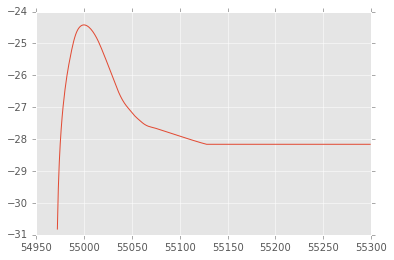

In [2]:
model = sncosmo.Model(source='hsiao')
model.set(z=0.5, t0=55000., amplitude=1.e-10)
x=np.arange(54900, 55300)
y=model.bandmag('desr', 'ab', x)
#y=model.bandflux('desr', x)
plt.plot(x, -y)

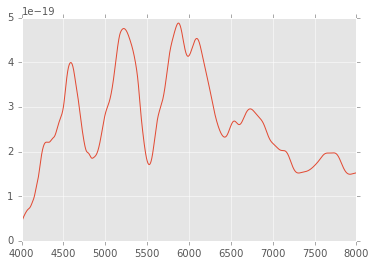

In [3]:
x = np.arange(4000, 8000)
y = model.flux(54990., x)
plt.plot(x, y)

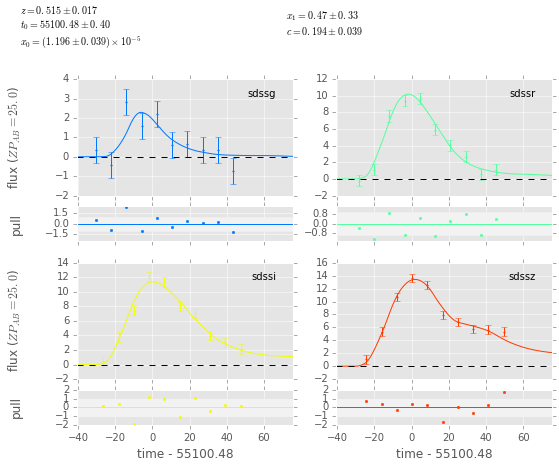

In [6]:
data = sncosmo.load_example_data()
model = sncosmo.Model(source='salt2')
res, fitted_model = sncosmo.fit_lc(data, model,
                                    ['z', 't0', 'x0', 'x1', 'c'],
                                    bounds={'z':(0.3, 0.7)})
sncosmo.plot_lc(data, model=fitted_model, errors=res.errors)
None;

In [7]:
from astropy.table import Table
obs = Table({'time': [56176.19, 56188.254, 56207.172],
             'band': ['desg', 'desr', 'desi'],
             'gain': [1., 1., 1.],
             'skynoise': [191.27, 147.62, 160.40],
             'zp': [30., 30., 30.],
             'zpsys':['ab', 'ab', 'ab']})
print obs

skynoise zpsys band gain    time    zp 
-------- ----- ---- ---- --------- ----
  191.27    ab desg  1.0  56176.19 30.0
  147.62    ab desr  1.0 56188.254 30.0
   160.4    ab desi  1.0 56207.172 30.0


In [8]:
model = sncosmo.Model(source='salt2')
params = {'z': 0.4, 't0': 56200.0, 'x0':1.e-5, 'x1': 0.1, 'c': -0.1}
lcs = sncosmo.realize_lcs(obs, model, [params])
print lcs[0]

   time   band      flux        fluxerr     zp  zpsys
--------- ---- ------------- ------------- ---- -----
 56176.19 desg -49.757462666 191.275940464 30.0    ab
56188.254 desr 330.127590715 149.228762842 30.0    ab
56207.172 desi 982.230041272 162.583432371 30.0    ab


In [9]:
area = 1.  # area in square degrees
tmin = 56175.  # minimum time
tmax = 56225.  # maximum time
zmax = 0.7

redshifts = list(sncosmo.zdist(0., zmax, time=(tmax-tmin), area=area))
print len(redshifts), "SNe"
print "redshifts:", redshifts

23 SNe
redshifts: [0.4303681262948027, 0.6006905846644438, 0.5878160430365621, 0.6002511056070106, 0.4257331930681605, 0.698024886774389, 0.48999976334630285, 0.31835925016439415, 0.5149928133414561, 0.35064743656298675, 0.3513795040584166, 0.6280353626452684, 0.421269035196969, 0.5965648762380351, 0.5014640159974852, 0.23424037981128729, 0.4267955223236602, 0.645764418848401, 0.5563859096572557, 0.5332753801484689, 0.6131374636533711, 0.44627775551005394, 0.5065553865179746]


In [10]:
from numpy.random import uniform, normal
params = [{'x0':1.e-5, 'x1':normal(0., 1.), 'c':normal(0., 0.1),
           't0':uniform(tmin, tmax), 'z': z}
          for z in redshifts]
for p in params:
    print p

{'z': 0.4303681262948027, 'x0': 1e-05, 'x1': 0.4432348349437859, 'c': -0.1064654924341708, 't0': 56190.91531053266}
{'z': 0.6006905846644438, 'x0': 1e-05, 'x1': -1.3046480466544146, 'c': -0.0498322323089279, 't0': 56223.61041852877}
{'z': 0.5878160430365621, 'x0': 1e-05, 'x1': -0.201155179314307, 'c': 0.01900266940188917, 't0': 56196.48372868018}
{'z': 0.6002511056070106, 'x0': 1e-05, 'x1': 0.4445834094449251, 'c': -0.09307915884679759, 't0': 56208.83379570571}
{'z': 0.4257331930681605, 'x0': 1e-05, 'x1': -0.347311667174845, 'c': -0.08215366301980566, 't0': 56187.46132496665}
{'z': 0.698024886774389, 'x0': 1e-05, 'x1': 0.49949116924449377, 'c': -0.05209904435160371, 't0': 56204.1132155687}
{'z': 0.48999976334630285, 'x0': 1e-05, 'x1': 0.9469901512731864, 'c': -0.10035059956314829, 't0': 56208.70319998752}
{'z': 0.31835925016439415, 'x0': 1e-05, 'x1': -0.34178465103313643, 'c': -0.20336762815488846, 't0': 56185.33053574959}
{'z': 0.5149928133414561, 'x0': 1e-05, 'x1': -0.934970795750247

In [15]:
lcs = sncosmo.realize_lcs(obs, model, params)
print lcs[0]
print lcs[0].meta

   time   band      flux        fluxerr     zp  zpsys
--------- ---- ------------- ------------- ---- -----
 56176.19 desg 243.305545546 191.846447428 30.0    ab
56188.254 desr 787.176355396 150.503860856 30.0    ab
56207.172 desi 517.816015846 162.083556307 30.0    ab
{'c': -0.1064654924341708, 'x0': 1e-05, 'z': 0.4303681262948027, 'x1': 0.4432348349437859, 't0': 56190.91531053266}


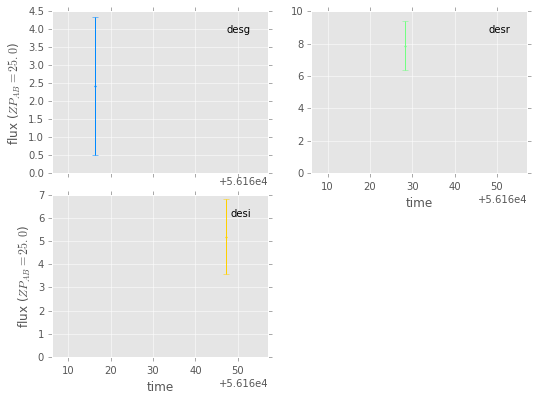

In [16]:
sncosmo.plot_lc(lcs[0])
None;